In [1]:

import pandas as pd
import numpy as py
import os
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import cv2


In [3]:
test_image=cv2.imread('/Users/nagarajugooty/Downloads/IMG_0339.JPG')

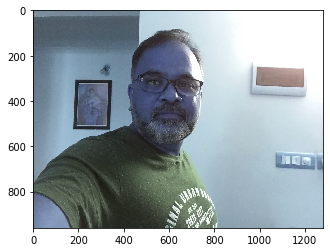

In [4]:
plt.imshow(test_image)

In [5]:
test_image.shape

(960, 1280, 3)

In [6]:
datagen=ImageDataGenerator(rotation_range=180)

In [7]:
image=load_img('/Users/nagarajugooty/Downloads/IMG_0339.JPG')

In [8]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [9]:
image=img_to_array(image)

In [10]:
image.shape

(960, 1280, 3)

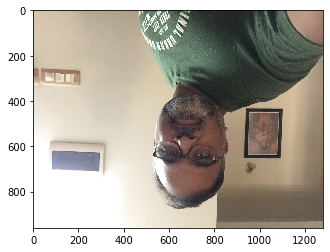

In [11]:
plt.imshow(image.astype(int))

In [12]:
image=image.reshape((1,)+image.shape)

In [13]:
sh=image.shape

In [14]:
type(sh)

tuple

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, rescale=1.0/255.0)


In [17]:
for index, batch in enumerate(datagen.flow(image)):
    if index >30:
        break
   # DATA_PATH, target_size=(200, 200))

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()

In [20]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),steps_per_epoch=xtrain.shape[0] // batch_size,epochs=36,verbose=1)
